In [205]:
# code reference: https://github.com/jeffheaton/t81_558_deep_learning/blob/dce2306815d4ac7c6443a01c071901822d612c6a/t81_558_class_06_4_keras_images.ipynb

%matplotlib inline
from PIL import Image, ImageFile
from matplotlib.pyplot import imshow
import requests
import numpy as np
from io import BytesIO
from IPython.display import display, HTML
import os
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
import tensorflow as tf
import time


IMAGE_WIDTH = 32
IMAGE_HEIGHT = 32
IMAGE_CHANNELS = 3

# Nicely formatted time string
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return f"{h}:{m:>02}:{s:>05.2f}"

def make_square(img):
    cols,rows = img.size
    
    if rows>cols:
        pad = (rows-cols)/2
        img = img.crop((pad,0,cols,cols))
    else:
        pad = (cols-rows)/2
        img = img.crop((0,pad,rows,rows))
    
    return img

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        try:
            img = Image.open(os.path.join(folder,filename))
            img.load()
            if img is not None:
                make_square(img)
                img = img.resize((IMAGE_WIDTH,IMAGE_HEIGHT),Image.ANTIALIAS)
                class_label =  0 if filename[0] == '0' else 1  
                images.append((img,class_label))
#                 print("Loaded ",filename)
                
        except:
              continue;
#             print("An exception occurred while reading image",filename)
    return images

training_data = []
training_data_label = []
testing_data = []
testing_data_label = []

randomised_data = []

train_folder="HW4-dataset/training"
test_folder="HW4-dataset/testing"
randomised_folder="HW4-dataset/randomised"

train_images=load_images_from_folder(train_folder)
test_images=load_images_from_folder(test_folder)
randomised_images=load_images_from_folder(randomised_folder)

for i in train_images:
    (img, label) = i
#   display(img)
    
    training_data.append(np.asarray(img))
    training_data_label.append(label)
    
    
for i in test_images:
    (img, label) = i
#   display(img)
    
    testing_data.append(np.asarray(img))
    testing_data_label.append(label)
    
for i in randomised_images:
    (img, label) = i
#   display(img)
    
    randomised_data.append(np.asarray(img))
    
    
    
    
    
    
    

In [206]:
training_data = np.array(training_data) / 127.5 - 1.
testing_data = np.array(testing_data) / 127.5 - 1.


randomised_data = np.array(randomised_data) / 127.5 - 1.


In [207]:
print("Saving image binary...")
np.save("HW4-training",training_data) # Saves as "training.npy"
np.save("HW4-testing",testing_data)
print("Done.")

Saving image binary...
Done.


In [208]:
num_classes = 2
epochs = 20


if K.image_data_format() == 'channels_first':
    training_data = training_data.reshape(training_data.shape[0], IMAGE_CHANNELS, IMAGE_WIDTH, IMAGE_HEIGHT)
    testing_data = testing_data.reshape(testing_data.shape[0], IMAGE_CHANNELS, IMAGE_WIDTH, IMAGE_HEIGHT)
    randomised_data = randomised_data.reshape(randomised_data.shape[0], IMAGE_CHANNELS, IMAGE_WIDTH, IMAGE_HEIGHT)
    input_shape = (IMAGE_CHANNELS, IMAGE_WIDTH, IMAGE_HEIGHT)
else:
    training_data = training_data.reshape(training_data.shape[0], IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)
    testing_data = testing_data.reshape(testing_data.shape[0], IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)
    randomised_data = randomised_data.reshape(randomised_data.shape[0], IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)
    input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)

In [209]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [210]:
model2 = Sequential()
model2.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Flatten())
model2.add(Dense(128, activation='sigmoid'))
model2.add(Dense(num_classes, activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [211]:
start_time = time.time()

training_data_label = tensorflow.keras.utils.to_categorical(training_data_label, num_classes)
testing_data_label = tensorflow.keras.utils.to_categorical(testing_data_label, num_classes)



In [212]:
model.fit(training_data, training_data_label,
          epochs=epochs,
          verbose=2,
          validation_data=(testing_data, testing_data_label))
score = model.evaluate(testing_data, testing_data_label, verbose=0)
print('Test loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))

elapsed_time = time.time() - start_time
print("Elapsed time: {}".format(hms_string(elapsed_time)))


Train on 22 samples, validate on 8 samples
Epoch 1/20
22/22 - 3s - loss: 0.7360 - accuracy: 0.5000 - val_loss: 1.0424 - val_accuracy: 0.5000
Epoch 2/20
22/22 - 0s - loss: 0.8690 - accuracy: 0.5909 - val_loss: 1.1559 - val_accuracy: 0.5000
Epoch 3/20
22/22 - 0s - loss: 1.1014 - accuracy: 0.5909 - val_loss: 0.5189 - val_accuracy: 0.7500
Epoch 4/20
22/22 - 0s - loss: 0.5530 - accuracy: 0.6818 - val_loss: 0.3895 - val_accuracy: 1.0000
Epoch 5/20
22/22 - 0s - loss: 0.3258 - accuracy: 0.9091 - val_loss: 0.3535 - val_accuracy: 1.0000
Epoch 6/20
22/22 - 0s - loss: 0.2751 - accuracy: 0.8636 - val_loss: 0.2693 - val_accuracy: 1.0000
Epoch 7/20
22/22 - 0s - loss: 0.2579 - accuracy: 0.9545 - val_loss: 0.2029 - val_accuracy: 1.0000
Epoch 8/20
22/22 - 0s - loss: 0.1627 - accuracy: 0.9545 - val_loss: 0.1566 - val_accuracy: 1.0000
Epoch 9/20
22/22 - 0s - loss: 0.1515 - accuracy: 0.9091 - val_loss: 0.1298 - val_accuracy: 1.0000
Epoch 10/20
22/22 - 0s - loss: 0.0948 - accuracy: 1.0000 - val_loss: 0.1097

In [213]:
start_time = time.time()
model2.fit(training_data, training_data_label,
          epochs=epochs,
          verbose=2,
          validation_data=(testing_data, testing_data_label))
score = model2.evaluate(testing_data, testing_data_label, verbose=0)
print('Test loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))

elapsed_time = time.time() - start_time
print("Elapsed time: {}".format(hms_string(elapsed_time)))


Train on 22 samples, validate on 8 samples
Epoch 1/20
22/22 - 2s - loss: 0.7097 - accuracy: 0.5000 - val_loss: 1.3094 - val_accuracy: 0.5000
Epoch 2/20
22/22 - 0s - loss: 1.2791 - accuracy: 0.5000 - val_loss: 0.5448 - val_accuracy: 0.7500
Epoch 3/20
22/22 - 0s - loss: 0.4769 - accuracy: 0.8636 - val_loss: 0.6380 - val_accuracy: 0.5000
Epoch 4/20
22/22 - 0s - loss: 0.5033 - accuracy: 0.5909 - val_loss: 0.6333 - val_accuracy: 0.5000
Epoch 5/20
22/22 - 0s - loss: 0.4584 - accuracy: 0.6818 - val_loss: 0.4347 - val_accuracy: 0.6250
Epoch 6/20
22/22 - 0s - loss: 0.2746 - accuracy: 0.9091 - val_loss: 0.2568 - val_accuracy: 1.0000
Epoch 7/20
22/22 - 0s - loss: 0.1549 - accuracy: 1.0000 - val_loss: 0.1853 - val_accuracy: 1.0000
Epoch 8/20
22/22 - 1s - loss: 0.1298 - accuracy: 0.9545 - val_loss: 0.1572 - val_accuracy: 1.0000
Epoch 9/20
22/22 - 0s - loss: 0.1215 - accuracy: 0.9545 - val_loss: 0.1178 - val_accuracy: 1.0000
Epoch 10/20
22/22 - 0s - loss: 0.0935 - accuracy: 0.9545 - val_loss: 0.0852

------------------------------------


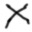

cross % 99.999893
circle % 0.000109
------------------------------------


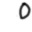

cross % 0.104386
circle % 99.895608
------------------------------------


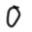

cross % 0.085473
circle % 99.914527
------------------------------------


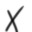

cross % 99.983466
circle % 0.016526
------------------------------------


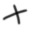

cross % 99.836630
circle % 0.163367
------------------------------------


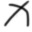

cross % 7.878711
circle % 92.121291
------------------------------------


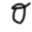

cross % 1.516559
circle % 98.483443
------------------------------------


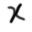

cross % 99.879360
circle % 0.120643
------------------------------------


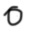

cross % 0.002612
circle % 99.997389
------------------------------------


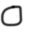

cross % 0.001139
circle % 99.998856
------------------------------------


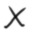

cross % 99.999857
circle % 0.000142
------------------------------------


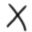

cross % 99.999297
circle % 0.000704


In [214]:

classes = model.predict(randomised_data)
# show the inputs and predicted outputs
for i in range(len(classes)):
    class_labels = classes[i]
    print("------------------------------------")
    display(randomised_images[i][0])
    print("cross %", '%f' % (class_labels[0]*100))
    print("circle %", '%f' % (class_labels[1]*100))
    


------------------------------------


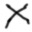

cross % 99.962342
circle % 0.037658
------------------------------------


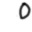

cross % 2.276053
circle % 97.723949
------------------------------------


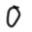

cross % 1.934893
circle % 98.065108
------------------------------------


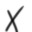

cross % 99.677485
circle % 0.322520
------------------------------------


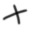

cross % 99.736136
circle % 0.263860
------------------------------------


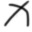

cross % 26.528963
circle % 73.471040
------------------------------------


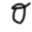

cross % 39.804772
circle % 60.195231
------------------------------------


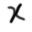

cross % 99.735677
circle % 0.264325
------------------------------------


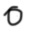

cross % 0.623473
circle % 99.376523
------------------------------------


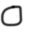

cross % 0.115606
circle % 99.884391
------------------------------------


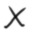

cross % 99.962831
circle % 0.037164
------------------------------------


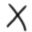

cross % 99.945265
circle % 0.054740


In [215]:
classes = model2.predict(randomised_data)
# show the inputs and predicted outputs
for i in range(len(classes)):
    class_labels = classes[i]
    print("------------------------------------")
    display(randomised_images[i][0])
    print("cross %", '%f' % (class_labels[0]*100))
    print("circle %", '%f' % (class_labels[1]*100))

# a) Dataset Description

Training Dataset: balanced consists of 22 items
Testing Dataset: balanced consists of 8 items
Randomised Verification Dataset: 12 items

# b) CNN Description

- First CNN consists of 8 layers (Taken from Jeff Heaton course) uses RELU as activation function 
- Second CNN consists of 6 layers with sigmoid as activation function

# c, d) Displayed above

# e) Epoch's Required for Convergence

Its evident by looking at the metrics that convergence starts at 4th Epoch after jumping between between convergence and divergence in the first 3 Epochs

# f) Misclassified Images

The 6th image in the predicted images section is being classified wrong. I think its because it has some similarity with the circle images and we didnot have any such image or close to this image in our training dataset. to fix this we can add this in our training data set.

Also it would be great if we can discuss in class, How to design such a network which can learn while predicting. 
